In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
from shapely.geometry import Point, Polygon

### Load field data collected in 2020, georeferenced points, and merge into 1 df

In [65]:
field_data = pd.read_csv("./field_data.csv")
field_data.head()

,id,TDRshort,TDRmed,NDVI,Irtherm,Trufirm
0,1,45.2,50.9,0.85,70,457
1,2,48.4,50.0,0.84,73,534
2,3,47.0,52.8,0.77,72,457
3,4,45.2,53.6,0.84,73,518
4,5,42.6,52.6,0.83,73,459


In [66]:
points = pd.read_csv("./points.csv", index_col=False)
points.head()

,id,latitude,longitude
0,100,35.298817,-120.665521
1,99,35.298717,-120.665489
2,98,35.298616,-120.665456
3,97,35.298515,-120.665424
4,96,35.298414,-120.665391


In [67]:
merged_data = pd.merge(points, field_data, on="id")
merged_data.head()

,id,latitude,longitude,TDRshort,TDRmed,NDVI,Irtherm,Trufirm
0,100,35.298817,-120.665521,41.1,52.9,0.68,68,519
1,99,35.298717,-120.665489,39.5,48.7,0.79,70,621
2,98,35.298616,-120.665456,35.0,39.6,0.77,70,517
3,97,35.298515,-120.665424,30.2,38.7,0.80,72,558
4,96,35.298414,-120.665391,44.5,50.5,0.83,71,493


### IDW interpolation

In [68]:
# define field corners
ne = [35.298971, -120.664876]
se = [35.298036, -120.664575]
sw = [35.297895, -120.665234]
nw = [35.298829, -120.665535]

field_boundary = Polygon([nw, ne, se, sw, nw])

# create grid
grid_size = 40
min_lat, max_lat = min([nw[0], ne[0], sw[0], se[0]]), max([nw[0], ne[0], sw[0], se[0]])
min_lon, max_lon = min([nw[1], ne[1], sw[1], se[1]]), max([nw[1], ne[1], sw[1], se[1]])
grid_lat, grid_lon = np.mgrid[
    min_lat : max_lat : grid_size * 1j, min_lon : max_lon : grid_size * 1j
]

In [69]:
# interpolate
points = merged_data[["latitude", "longitude"]].values
values = merged_data["Irtherm"].values
grid_values = griddata(points, values, (grid_lat, grid_lon), method="cubic")

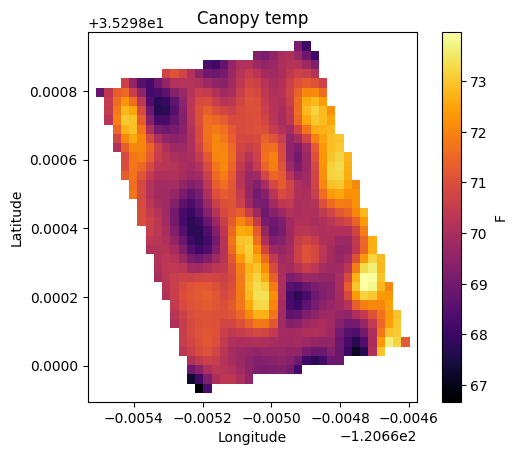

In [81]:
# plot
plt.imshow(
    grid_values,
    extent=(min_lon, max_lon, min_lat, max_lat),
    origin="lower",
    cmap="inferno",
)
plt.colorbar(label="F")
plt.title("Canopy temp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()